In [1]:
# Import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [22]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5, -rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S] * k  # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


## Computing the probability density

In [23]:
def compute_p(X, mean, sigma):
    """
    Compute the probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        p: (n, ) numpy array, the probability of each data point

    >>> compute_p(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([0.15915494, 0.05854983])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    front = 1 / (np.pow(2 * np.pi, mean.shape[0] / 2) * np.pow(np.linalg.det(sigma), 0.5))
    back = np.einsum('ij,jk->i', -0.5 * (X - mean) @ np.linalg.inv(sigma), (X - mean).T)
    return front * np.exp(back)


test(compute_p)

✅ Your `compute_p` passed 1 tests.


In [24]:
ps = [
    compute_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [25]:
assignments = np.argmax(ps, axis=0)
print(assignments)

[0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]


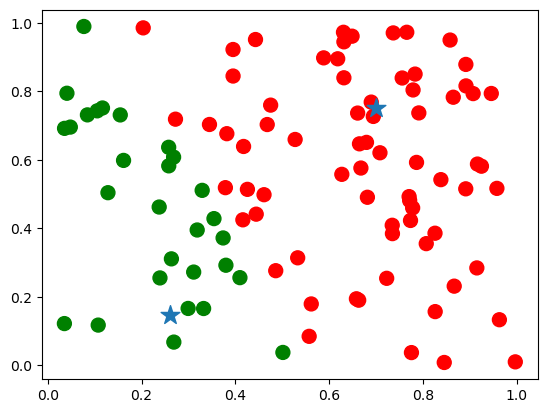

In [26]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()

Solution
===

In [27]:
def compute_log_p(X, mean, sigma):
    """
    Compute the log probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        log_p: (n, ) numpy array, the log probability of each data point

    >>> compute_log_p(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([-1.83787707, -2.83787707])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    return np.log(compute_p(X, mean, sigma))


test(compute_log_p)

✅ Your `compute_log_p` passed 1 tests.


In [28]:
log_ps = [
    compute_log_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

/tmp/ipykernel_2581/2840601711.py:19: RuntimeWarning: divide by zero encountered in log
  return np.log(compute_p(X, mean, sigma))


In [19]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
[array([-2.28670595e+01,  9.52088343e+01, -2.94702662e+02, -1.74242080e+02,
       -1.05527756e+02, -1.88156503e+02,  5.38068990e+01, -8.00073541e+01,
       -2.50215709e+02, -2.76833172e+02,  1.02022299e+02, -1.49573039e+02,
       -9.09900371e+00, -1.35531388e+01, -1.41924879e+02, -2.29846825e+01,
       -2.94102656e+02, -1.04103367e+01, -1.96898880e+02, -2.57345373e+02,
       -6.06780313e+01, -2.20060892e+02, -2.16222646e+02, -2.55338704e+02,
       -3.89383498e+01, -3.80720894e+01,  4.45079172e+01,  1.37605184e+01,
       -3.01139741e+01, -1.54728903e+02, -1.98424218e+02, -1.54384115e+01,
       -1.11177055e+01, -2.10090756e+02, -1.66671315e+02,  3.30608307e+00,
        1.05142305e+02, -1.59318371e+02, -8.73801713e+01, -2.07668816e+02,
       -2.88797385e+02, -2.65160493e+02, -2.5

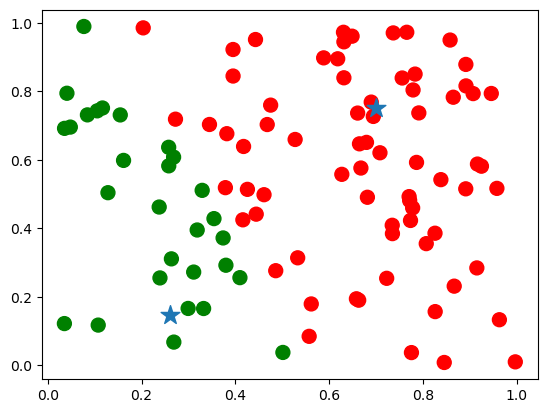

In [17]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()